In [99]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import IPython
import scipy

from PIL import Image

In [105]:
def display_image(img_array, title="", vmin=0, vmax=1):
    plt.imshow(1 - img_array, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.clim(1 - vmax, 1 - vmin)
    plt.show()
    
def display_image255(img_array, title="", vmin=0, vmax=255):
    plt.imshow(255 - img_array, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.clim(255 - vmax, 255 - vmin)
    plt.show()
    
def resize_grayscale_image(image, scale_factor):
    image = image.astype(np.uint8)
    smaller_image = cv.resize(image, None, fx=1/scale_factor, fy=1/scale_factor, interpolation=cv.INTER_AREA)
    return smaller_image

def multiply_struct_elem(B, n):
    if n == 0:
        raise ValueError
    R = B.copy()
    for _ in range(n - 1):
        R = scipy.ndimage.grey_dilation(add_border(R, 1), structure=B)
    return R

def add_border(matrix, n):
    rows, cols = matrix.shape
    new_matrix = np.zeros((rows + n * 2, cols + n * 2), dtype=matrix.dtype)
    new_matrix[n:rows + n, n:cols + n] = matrix
    return new_matrix

def remove_border(matrix, n):
    rows, cols = matrix.shape
    new_matrix = matrix[n:rows - n, n:cols - n]
    return new_matrix

def PS(X, n, B):
    if n > 0:
        first = scipy.ndimage.grey_opening(X, structure=multiply_struct_elem(B, n))
        second = scipy.ndimage.grey_opening(X, structure=multiply_struct_elem(B, n + 1))
        return sum(sum(first - second))
    elif n == 0:
        first = X
        second = scipy.ndimage.grey_opening(X, structure=B)
        return sum(sum(first - second))
    elif n == -1:
        first = scipy.ndimage.grey_closing(X, structure=B)
        second = X
        return sum(sum(first - second))
    elif n < -1:
        first = scipy.ndimage.grey_closing(X, structure=multiply_struct_elem(B, -n))
        second = scipy.ndimage.grey_closing(X, structure=multiply_struct_elem(B, -n - 1))
        return sum(sum(first - second))
   

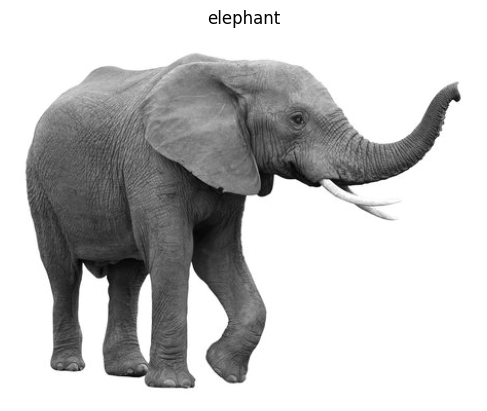

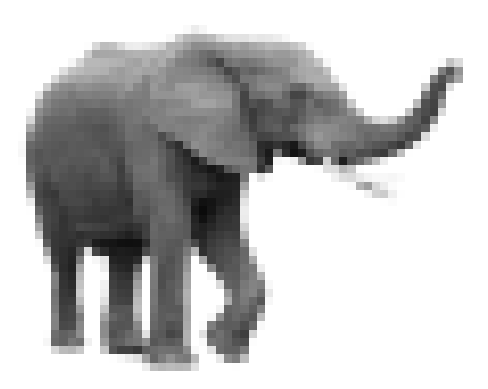

In [101]:
filename = 'elephant'
binary_image = 255 - cv.imread(f'{filename}.jpg', cv.IMREAD_GRAYSCALE)
display_image255(binary_image, 'elephant')
img_array = binary_image
scaled_image = resize_grayscale_image(img_array, scale_factor=8)
display_image255(scaled_image)

## Задание структурирующего элемента

In [117]:
B = np.array([
    [2, 3, 2],
    [3, 4, 3],
    [2, 3, 2]])

In [118]:
multiply_struct_elem(B, 2)

array([[4, 5, 6, 5, 4],
       [5, 6, 7, 6, 5],
       [6, 7, 8, 7, 6],
       [5, 6, 7, 6, 5],
       [4, 5, 6, 5, 4]])

## Морфологический спектр

-45 -44 -43 -42 -41 -40 -39 -38 -37 -36 -35 -34 -33 -32 -31 -30 -29 -28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10 -9 -8 -7 -6 -5 -4 -3 -2 -1 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 

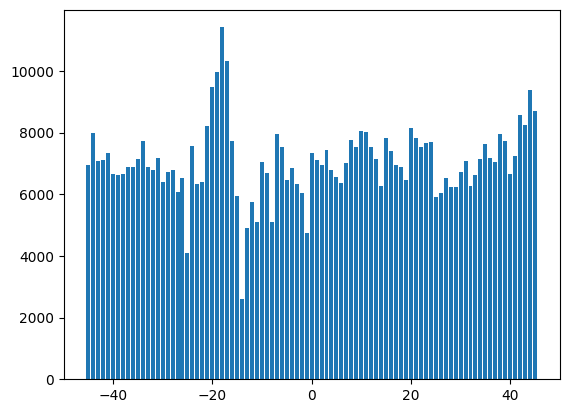

In [106]:
def non_zero_slice(my_dict):
    keys = list(my_dict.keys())
    first_non_zero = next(key for key in keys if my_dict[key] != 0)
    last_non_zero = next(key for key in reversed(keys) if my_dict[key] != 0)
    result_slice = {key: my_dict[key] for key in range(first_non_zero, last_non_zero + 1)}
    return result_slice

set = {}

for n in range(-min(scaled_image.shape), min(scaled_image.shape) + 1):
    print(n, end=' ')
    set[n] = PS(scaled_image, n, B)
    
set = non_zero_slice(set)
plt.bar(set.keys(), set.values())
plt.show()

In [119]:
multiply_struct_elem(B, 300)

array([[600, 601, 602, ..., 602, 601, 600],
       [601, 602, 603, ..., 603, 602, 601],
       [602, 603, 604, ..., 604, 603, 602],
       ...,
       [602, 603, 604, ..., 604, 603, 602],
       [601, 602, 603, ..., 603, 602, 601],
       [600, 601, 602, ..., 602, 601, 600]])

In [124]:
sum(sum(scaled_image))

7353

In [127]:
scaled_image = np.array(scaled_image, np.int32)

In [141]:
np.all(scipy.ndimage.grey_erosion(scaled_image, structure=multiply_struct_elem(B, 11)) < 0)

True

In [132]:
N = 0
while not np.all(scipy.ndimage.grey_erosion(scaled_image, structure=multiply_struct_elem(B, N + 1)) < 0):
    N += 1
print(N)

10


In [142]:
X = scaled_image
n = 10
first = scipy.ndimage.grey_opening(X, structure=multiply_struct_elem(B, n))
second = scipy.ndimage.grey_opening(X, structure=multiply_struct_elem(B, n + 1))
sum(sum(first - second))

34953